In [1]:
from sklearn.feature_extraction.text import CountVectorizer

# create CountVectorizer object
vectorizer = CountVectorizer()
corpus = [
    'The greatest glory in living lies not in never falling, but in rising every time we fall.',
    'The way to get started is to quit talking and begin doing.',
    'If life were predictable it would cease to be life, and be without flavor.',
    'Life is what happens when you are busy making other plans.',
]

# Learn the vocabulary and store CountVectorizer sparse matrix in X
X = vectorizer.fit_transform(corpus)

# columns of X correspond to the result of this method
vectorizer.get_feature_names() == (
    ['be', 'begin', 'busy', 'fall',
    'glory', 'is', 'life', 'other',
    'quit', 'time', 'to', 'way'])

# retrieving the matrix in the numpy form
X.toarray()

# transforming a new document according to learn vocabulary
vectorizer.transform(['A glory.']).toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
      dtype=int64)

In [3]:
from sklearn.feature_extraction.text import TfidfTransformer

# create tf-idf object
transformer = TfidfTransformer(smooth_idf=False)

# Learn the vocabulary and store tf-idf sparse matrix in tfidf
tfidf = transformer.fit_transform(X)

# retrieving matrix in numpy form as we did it before
tfidf.toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.21080243, 0.        , 0.        , 0.21080243, 0.21080243,
        0.21080243, 0.        , 0.        , 0.21080243, 0.21080243,
        0.        , 0.        , 0.63240729, 0.        , 0.        ,
        0.21080243, 0.        , 0.21080243, 0.        , 0.21080243,
        0.21080243, 0.        , 0.        , 0.        , 0.        ,
        0.21080243, 0.        , 0.        , 0.14957063, 0.21080243,
        0.        , 0.        , 0.21080243, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.21871556, 0.        , 0.        , 0.30825419, 0.        ,
        0.        , 0.        , 0.30825419, 0.        , 0.        ,
        0.        , 0.        , 0.30825419, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.21871556, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.3

In [7]:
# importing all necessary modules
from nltk.tokenize import sent_tokenize, word_tokenize
import warnings

warnings.filterwarnings(action = 'ignore')

import gensim
from gensim.models import Word2Vec

# Reads 'alice.txt' file
sample = open("D:/Downloads/Semester VII/NLP/alice_in_wonderland.txt", "r")
s = sample.read()

# Replaces escape character with space
f = s.replace("\n", " ")

data = []
# iterate through each sentence in the file
for i in sent_tokenize(f):
    temp = []
    
    # tokenize the sentence into words
    for j in word_tokenize(i):
        temp.append(j.lower())
        
    data.append(temp)
    
# Create CBOW model
model1 = gensim.models.Word2Vec(data, min_count = 1, size = 100, window = 5)

# Print results
print("Cosine similarity between 'alice' " + "and 'wonderland' - CBOW : ",
     model1.similarity('alice', 'wonderland'))

print("Cosine similarity between 'alice' " + "and 'machines' - CBOW : ",
     model1.similarity('alice', 'machines'))

# Create Skip Gram model
model2 = gensim.models.Word2Vec(data, min_count = 1, size = 100, window = 5, sg = 1)

# Print results
print("Cosine similarity between 'alice' " + "and 'wonderland' - Skip Gram : ",
     model1.similarity('alice', 'wonderland'))

print("Cosine similarity between 'alice' " + "and 'machines' - Skip Gram : ",
     model1.similarity('alice', 'machines'))

Cosine similarity between 'alice' and 'wonderland' - CBOW :  0.993226
Cosine similarity between 'alice' and 'machines' - CBOW :  0.9709195
Cosine similarity between 'alice' and 'wonderland' - Skip Gram :  0.993226
Cosine similarity between 'alice' and 'machines' - Skip Gram :  0.9709195


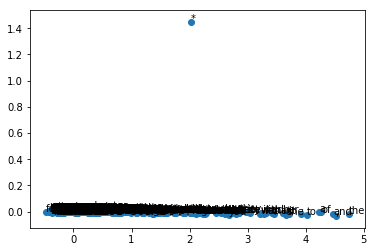

In [8]:
from sklearn.decomposition import PCA
from matplotlib import pyplot

%matplotlib inline

# fit a 2d PCA model to the vectors
X = model1[model1.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

# create a scatter plot of the projection
pyplot.scatter(result[:,0], result[:, 1])
words = list(model1.wv.vocab)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))

pyplot.show()

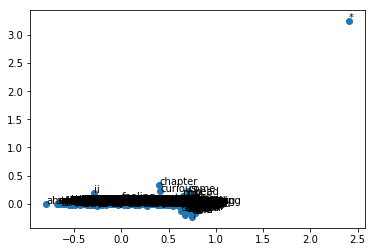

In [9]:
#fit a 2d PCA model to the vectors
X = model2[model2.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model2.wv.vocab)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
    
pyplot.show()